# Predicting House prices in Bengaluru

In [1]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the data from csv file
train_df = pd.read_csv('D:/Bhavuck/Data Science/Predicting House Prices In Bengaluru/Predicting-House-Prices-In-Bengaluru-Train-Data.csv')

In [3]:
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
train_df.shape

(13320, 9)

In [5]:
train_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
train_df.describe(include='all')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [7]:
#checking null values in all columns
train_df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [8]:
train_df['society'].isnull().sum()/train_df.shape[0]

0.41306306306306306

the null values in column 'society' is around 40%, which is very much, so instead of filling the null values, we drop the column

In [9]:
train_df.drop(columns='society', inplace=True)

C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


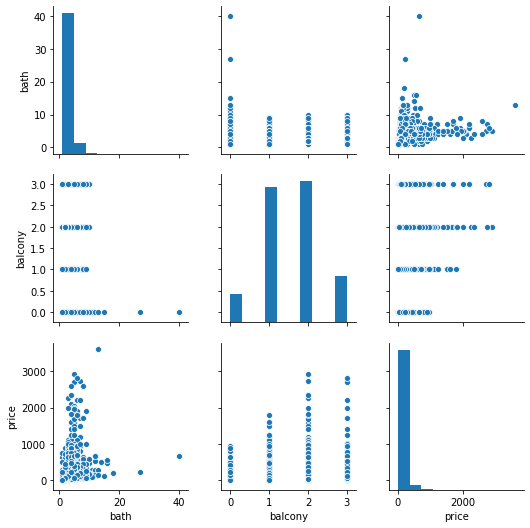

In [10]:
sns.pairplot(train_df)

replacing missing values in column 'location' with its mode

In [11]:
train_df['location'].mode()

0    Whitefield
dtype: object

In [12]:
train_df.loc[train_df['location'].isnull(), 'location'] = train_df['location'].mode()[0]

changing the dtype of column 'total_sqft' from object to float64

In [13]:
train_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
def change_to_float(area_size):
    if isinstance(area_size, str):
        area_size = area_size.split('Sq.')[0]
        area_size = area_size.split('Perch')[0]
        area_size = area_size.split('Acres')[0]
        area_size = area_size.split('Guntha')[0]
        area_size = area_size.split('Cents')[0]
        area_size = area_size.split('Grounds')[0]
        area_size = area_size.strip().split('-')
        area_size = list(map(float, area_size))
        area_size = sum(area_size)/len(area_size)
    return area_size

In [15]:
train_df['total_sqft'] = train_df['total_sqft'].apply(lambda x: change_to_float(x))

filling missing values in column 'size' with its mode

In [16]:
train_df.loc[train_df['size'].isnull(), 'size'] = train_df['size'].mode()[0]

getting numerical values from column 'size' and changing its dtype

In [17]:
train_df['size'] = train_df['size'].apply(lambda x: x.split(' ')[0])

In [18]:
train_df['size'] = train_df['size'].astype('float64')

In [19]:
train_df.dtypes

area_type        object
availability     object
location         object
size            float64
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

filling missing values in column 'bath' based on size and total_sqft and remaining values with median value

In [20]:
bath_groupby = train_df.groupby(['size', 'total_sqft'])['bath'].median()

In [21]:
for row in range(len(bath_groupby.index)):
    train_df.loc[(train_df['size'] == bath_groupby.index[row][0]) &
                (train_df['total_sqft'] == bath_groupby.index[row][1]) &
                (train_df['bath'].isnull()), 'bath'] = bath_groupby.values[row]

In [22]:
train_df['bath'].isnull().sum()

36

In [23]:
train_df.loc[train_df['bath'].isnull(), 'bath'] = train_df['bath'].median()

In [24]:
train_df['bath'].isnull().sum()

0

filling missing values in column 'balcony' based on size, total_sqft and bath and remaining values with median value

In [25]:
balcony_groupby = train_df.groupby(['size', 'total_sqft', 'bath'])['balcony'].median()

In [26]:
for row in range(len(balcony_groupby.index)):
    train_df.loc[(train_df['size'] == balcony_groupby.index[row][0]) &
                (train_df['total_sqft'] == balcony_groupby.index[row][1]) &
                (train_df['bath'] == balcony_groupby.index[row][2]) &
                (train_df['balcony'].isnull()), 'balcony'] = balcony_groupby.values[row]

In [27]:
train_df['balcony'].isnull().sum()

270

In [28]:
train_df.loc[train_df['balcony'].isnull(), 'balcony'] = train_df['balcony'].median()

In [29]:
train_df['balcony'].isnull().sum()

0

In [30]:
train_df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0,51.00


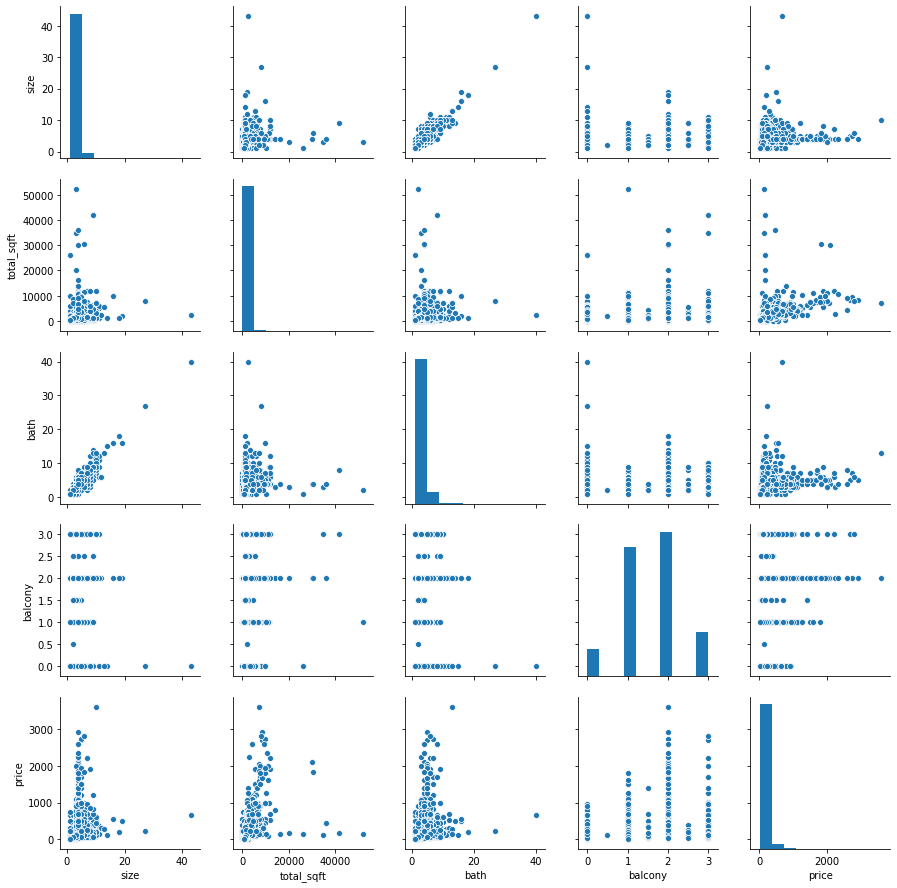

In [31]:
sns.pairplot(train_df)

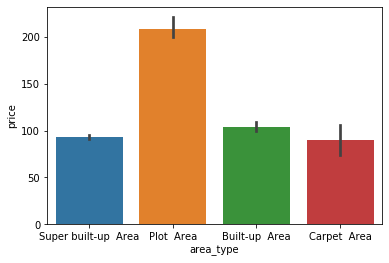

In [32]:
sns.barplot(x='area_type', y='price', data=train_df)

splitting the data in x and y

In [33]:
x = train_df[[x for x in train_df.columns if x not in ['price']]]
y = train_df[['price']]

In [34]:
x.head()

,area_type,availability,location,size,total_sqft,bath,balcony
0,Super built-up Area,19-Dec,Electronic City Phase II,2.0,1056.0,2.0,1.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4.0,2600.0,5.0,3.0
2,Built-up Area,Ready To Move,Uttarahalli,3.0,1440.0,2.0,3.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3.0,1521.0,3.0,1.0
4,Super built-up Area,Ready To Move,Kothanur,2.0,1200.0,2.0,1.0


In [35]:
y.head()

,price
0,39.07
1,120.00
2,62.00
3,95.00
4,51.00


creating dummy variables for categorical columns

In [36]:
x = pd.get_dummies(x)

In [37]:
x.shape

(13320, 1394)

splitting data into training and test dataset

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

baseline model

In [40]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
rf = RandomForestRegressor(n_estimators=300)

In [42]:
rf.fit(x_train,y_train)

C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [43]:
preds = rf.predict(x_test)

In [44]:
from sklearn.metrics import mean_absolute_error,r2_score

In [45]:
mean_absolute_error(y_test,preds)

28.836000255551436

In [46]:
r2_score(y_test,preds)

0.7019593836616496

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid3 = {'n_estimators' : [100,200,300]}

In [49]:
grid_search = GridSearchCV(rf, param_grid3)

In [50]:
grid_search.fit(x_train, y_train)

C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed 

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=300, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [100, 200, 30

In [51]:
grid_search.best_params_

{'n_estimators': 200}

In [59]:
clf = RandomForestRegressor(n_estimators=200)

In [60]:
clf.fit(x_train,y_train)

C:\Users\Bhavuck Jain\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=400,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [61]:
pred = clf.predict(x_test)

In [62]:
mean_absolute_error(y_test,pred)

28.882446233952063

In [63]:
r2_score(y_test,pred)

0.6856206060168519

r2_score from baseline model is 0.702

r2_score after parameter tuning is 0.686